# 1.3 Core Operations

## 1.3.1 Basic Operations on Images


In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('sky.jpg')
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
px = img[100,100]
print(px)

[145 115  96]


In [20]:
for x in range(100):
    for y in range(50):
        img[100+y,100+x]=[0,0,0]

In [21]:
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k==27:
    cv2.destroyAllWindows()

In [22]:
#accessing only blue pixel
blue = img[100,100,0]
print(blue)

0


In [23]:
img[100,100]=[255,255,255]
print(img[100,100])

[255 255 255]


In [24]:
#accessing RED value
img.item(10,10,2)

88

In [25]:
#modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [26]:
print(img.shape)

(838, 1435, 3)


In [27]:
print(img.size)

3607590


In [28]:
print(img.dtype)

uint8


In [39]:
sliced = img[280:340,330:390]

In [40]:
img[273:333,100:160]=sliced

## Splitting and Merging Image Channels

In [41]:
b,g,r = cv2.split(img)
img=cv2.merge((b,g,r))

In [42]:
b=img[:,:,0]

In [44]:
img[:,:,2] = 0

## Making Borders for Images (Padding)

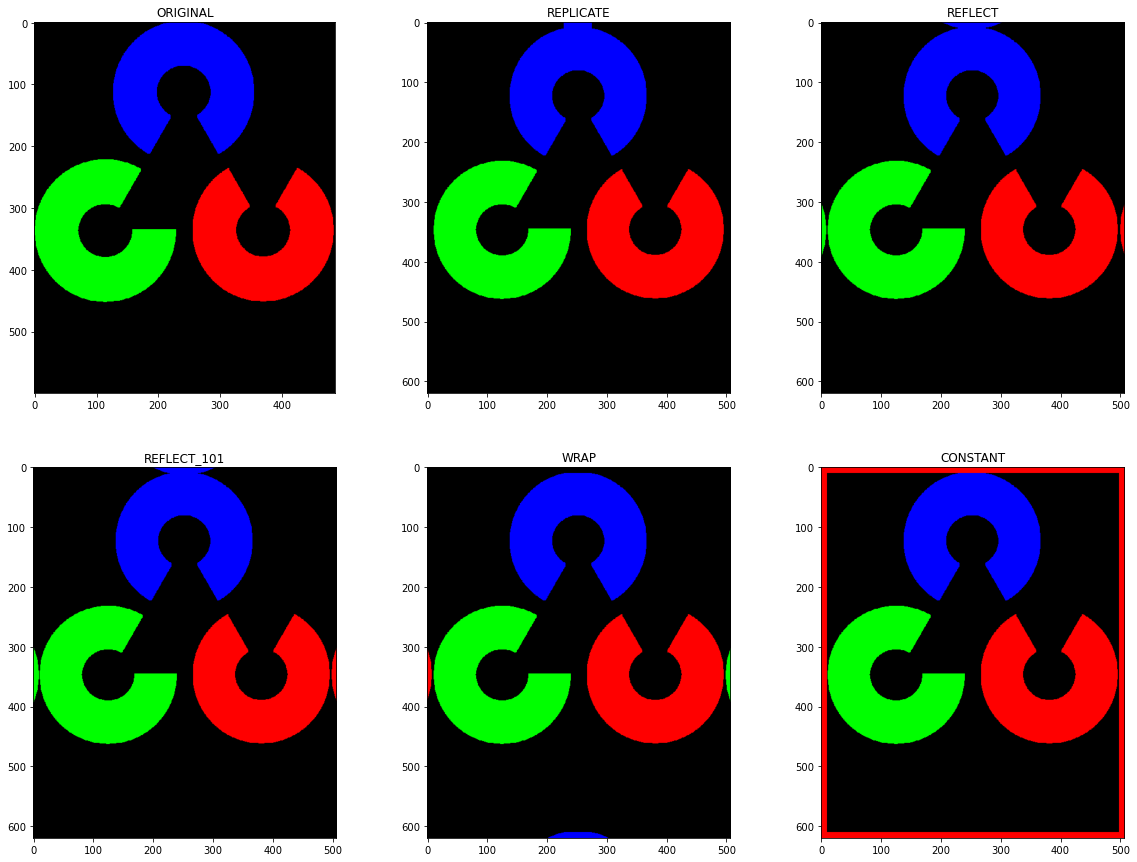

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('opencv_logo.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.figure(figsize=(20,15))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

## Image Addition

In [31]:
x = np.uint8([250])
y = np.uint8([10])

In [32]:
print(cv2.add(x,y)) # 250 + 10 = 260 => 255, 255를 넘으면, 255가 출력되고, 255를 넘지 않으면, 더한 값이 출력된다.

[[255]]


In [33]:
 print(x+y) # 250 + 10 = 260%256 = 4

[4]


## Image Blending


In [6]:
import cv2
import numpy as np

img1 = cv2.imread('sss.png')
img2 = cv2.imread('opencv_logo.png')

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Bitwise Operations

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load two images
img1 = cv2.imread('sss.png')
img2 = cv2.imread('opencv_logo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
